In [2]:
# we will work on our MovieLens dataset using the "Pandas" package.
# Pandas makes working with Tabular data very easy as we will see

import pandas as pd

# read the movies.csv file and create a Pandas DataFrame called movies_df
movies_df = pd.read_csv('ml-latest-small/movies.csv')

In [3]:
# now lets peek into this data frame object using its head function
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# now lets see what is shape, i.e, number of rows and number of columns in the dataframe
# to do that we access the shape variable of the data frame object

movies_df.shape

(9742, 3)

In [5]:
# to access 
print(movies_df.iloc[0][0])
print(movies_df.iloc[0][1])
print(movies_df.iloc[0][2])

1
Toy Story (1995)
Adventure|Animation|Children|Comedy|Fantasy


In [6]:
# now lets see how many movies are there in this data
len(movies_df.index)

9742

In [7]:
# now lets find genre distribution of the movies we have

movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
# the genres are pipe-character separated and it makes it hard for us find genre distribution

# lets add a new column called 'genres_arr' which has the genres represented as an array
movies_df['genres_arr'] = movies_df['genres'].str.split('|')

# now lets look at our dataframe to see the new column we added
movies_df.head()

,movieId,title,genres,genres_arr
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


In [9]:
# what if we only wanted to work on Animation movies
filter = movies_df.apply(lambda row: 'Animation' in row['genres_arr'], axis='columns')
filter.head()

0     True
1    False
2    False
3    False
4    False
dtype: bool

In [10]:
animation_df = movies_df[filter]
animation_df.head()
print(len(animation_df.index))

611


In [11]:
# now lets count the frequency of each genre across all our movies

genre_counter = {}
for index, row in movies_df.iterrows():
    for genre in row['genres_arr']:
        genre_counter[genre] = genre_counter.get(genre, 0) + 1

print(genre_counter)

{'Adventure': 1263, 'Animation': 611, 'Children': 664, 'Comedy': 3756, 'Fantasy': 779, 'Romance': 1596, 'Drama': 4361, 'Action': 1828, 'Crime': 1199, 'Thriller': 1894, 'Horror': 978, 'Mystery': 573, 'Sci-Fi': 980, 'War': 382, 'Musical': 334, 'Documentary': 440, 'IMAX': 158, 'Western': 167, 'Film-Noir': 87, '(no genres listed)': 34}


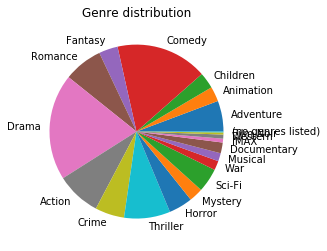

In [12]:
# now let's plot the genres distribution as a bar chart and visualize it

# introducing the matplotlib package which lets us plot charts, graphs in Python
%matplotlib inline
import matplotlib.pyplot as plt

# now lets plot this genre distribution as a pie chart
plt.pie(genre_counter.values(), labels=genre_counter.keys())
plt.title('Genre distribution')
plt.show()

[]

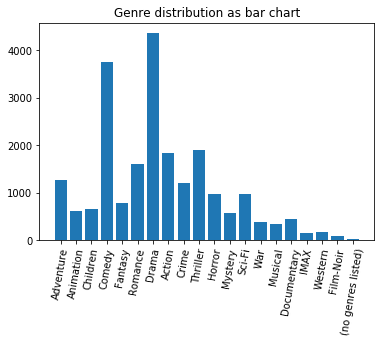

In [13]:
# we can also plot a bar chart (with grid lines and slanted x axis labels for better readability)
x = list(range(len(genre_counter)))
plt.xticks(x, genre_counter.keys(), rotation=80)
plt.bar(x, genre_counter.values())
plt.title('Genre distribution as bar chart')
plt.plot()

In [14]:
# Lets find masala movies to watch, as we all love masala :)
# Real masala movies has Action and Romance and Comedy and Thriller :)
masala_genres = ['Romance','Comedy', 'Action', 'Thriller']
masala_lambda = lambda x: set(masala_genres).issubset(x['genres_arr'])
masala_movies = movies_df[movies_df.apply(masala_lambda, axis='columns')]
masala_movies

,movieId,title,genres,genres_arr
337,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller,"[Action, Adventure, Comedy, Romance, Thriller]"
1856,2468,Jumpin' Jack Flash (1986),Action|Comedy|Romance|Thriller,"[Action, Comedy, Romance, Thriller]"
3460,4719,Osmosis Jones (2001),Action|Animation|Comedy|Crime|Drama|Romance|Th...,"[Action, Animation, Comedy, Crime, Drama, Roma..."
3608,4956,"Stunt Man, The (1980)",Action|Adventure|Comedy|Drama|Romance|Thriller,"[Action, Adventure, Comedy, Drama, Romance, Th..."
4445,6564,Lara Croft Tomb Raider: The Cradle of Life (2003),Action|Adventure|Comedy|Romance|Thriller,"[Action, Adventure, Comedy, Romance, Thriller]"
5774,31367,"Chase, The (1994)",Action|Adventure|Comedy|Crime|Romance|Thriller,"[Action, Adventure, Comedy, Crime, Romance, Th..."


In [15]:
# now let's do the 5 point summary of ratings attribute

# read the ratings.csv file and create a Pandas DataFrame called movies_df
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
# lets find out all values ratings users can give to movies
unique_ratings = ratings_df['rating'].unique()
unique_ratings.sort()
print(unique_ratings)

[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


In [17]:
# now lets find out number of ratings and number of users who have given those ratings

print('#ratings %d' % len(ratings_df.index))
print('#users %d' % len(ratings_df['userId'].unique()))

#ratings 100836
#users 610


In [18]:
# introducing the numpy package which is used to find various stats out of data
import numpy as np

# 5 point summary of ratings
print('min: %.1f' % np.min(ratings_df.rating))
print('25 percentile: %.1f' % np.percentile(ratings_df.rating, 25))
print('median: %.1f' % np.median(ratings_df['rating']))
print('median2: %.1f' % np.median(ratings_df.rating))
print('75 percentile: %.1f' % np.percentile(ratings_df.rating, 75))
print('max: %.1f' % np.max(ratings_df.rating))

min: 0.5
25 percentile: 3.0
median: 3.5
median2: 3.5
75 percentile: 4.0
max: 5.0


In [19]:
# now lets see how many movies have got each of these ratings

ratings_df['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

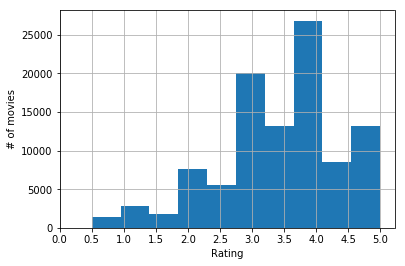

In [20]:
# now lets plot a histogram of movie ratings to get an overall picture
plt.hist(ratings_df.rating)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlabel('Rating')
plt.ylabel('# of movies')
plt.grid()
plt.show()

In [21]:
# now lets find the highest rated movies (movies with highest average rating)
ratings_df.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [22]:
# create a dataframe with just movieId and rating attributes
ratings_view = ratings_df[['movieId', 'rating']]
ratings_view.groupby(['movieId'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)

,movieId,rating
7638,88448,5.0
8089,100556,5.0
9065,143031,5.0
9076,143511,5.0
9078,143559,5.0
4245,6201,5.0
8136,102217,5.0
8130,102084,5.0
4240,6192,5.0
9104,145994,5.0


In [23]:
# but which movies are these, we want their names as well

# now lets merge/join the movies_df and ratings_df so that we can see the actual movie titles of top 10 movies
merged_df = pd.merge(ratings_df, movies_df, on='movieId')
merged_df.head()

,userId,movieId,rating,timestamp,title,genres,genres_arr
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"


In [24]:
# create a dataframe with just movieId and rating attributes
ratings_view = merged_df[['movieId', 'rating', 'title']]
ratings_view.groupby(['movieId', 'title'], as_index=False).mean().sort_values(by='rating', ascending=False).head(10)

,movieId,title,rating
7638,88448,Paper Birds (Pájaros de papel) (2010),5.0
8089,100556,"Act of Killing, The (2012)",5.0
9065,143031,Jump In! (2007),5.0
9076,143511,Human (2015),5.0
9078,143559,L.A. Slasher (2015),5.0
4245,6201,Lady Jane (1986),5.0
8136,102217,Bill Hicks: Revelations (1993),5.0
8130,102084,Justice League: Doom (2012),5.0
4240,6192,Open Hearts (Elsker dig for evigt) (2002),5.0
9104,145994,Formula of Love (1984),5.0


In [25]:
# but these are surely not the top rated movies we would expect there must be a problem

# lets check how many ratings have these movies received, lets take an example of movieId 163949
len(merged_df[merged_df['movieId'] == 163949].index)

0

In [26]:
# now lets only consider movies which have atleast 100 ratings and see how the top 10 movies change
temp_df = ratings_view.groupby(['movieId', 'title'], as_index=False).count()
well_rated_df = temp_df[temp_df.apply(lambda x: x['rating'] > 100, axis='columns')]

well_rated_df.head()

,movieId,title,rating
0,1,Toy Story (1995),215
1,2,Jumanji (1995),110
5,6,Heat (1995),102
9,10,GoldenEye (1995),132
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),177


In [27]:
final_df = pd.merge(merged_df, well_rated_df, how='inner', on=['movieId'])
final_df.head()

,userId,movieId,rating_x,timestamp,title_x,genres,genres_arr,title_y,rating_y
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story (1995),215
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story (1995),215
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story (1995),215
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story (1995),215
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story (1995),215


In [28]:
ratings_view = final_df[['movieId', 'rating_x', 'title_x']]
x = ratings_view.groupby(['movieId', 'title_x'], as_index=False).mean().sort_values(by='rating_x', ascending=False)
x.head(10)

,movieId,title_x,rating_x
25,318,"Shawshank Redemption, The (1994)",4.429022
58,858,"Godfather, The (1972)",4.289062
101,2959,Fight Club (1999),4.272936
75,1221,"Godfather: Part II, The (1974)",4.259690
129,48516,"Departed, The (2006)",4.252336
73,1213,Goodfellas (1990),4.250000
130,58559,"Dark Knight, The (2008)",4.238255
8,50,"Usual Suspects, The (1995)",4.237745
67,1197,"Princess Bride, The (1987)",4.232394
20,260,Star Wars: Episode IV - A New Hope (1977),4.231076
